<a href="https://colab.research.google.com/github/matheeshaw25/working-with-agents/blob/main/Krish_Naik_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Chatbots with LangGraph



In [2]:
!pip install langgraph langsmith

In [4]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 3.5 MB/s eta 0:00:00


In [10]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
print(langsmith)


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


In [11]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [12]:
from langchain_groq import ChatGroq

In [13]:
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x79721566fd50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7972151db890>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start building chatbot using LangGraph

In [14]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages #see State of the agent changing when messages change (keeping track of all those things)

In [15]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [16]:
graph_builder

In [17]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])} #invoke and appending it to messages

In [18]:
graph_builder.add_node("chatbot",chatbot)

In [19]:
graph_builder

In [20]:
graph_builder.add_edge(START,"chatbot")#add START and chatbot
graph_builder.add_edge("chatbot",END)#add chatbot and END

In [21]:
graph = graph_builder.compile()

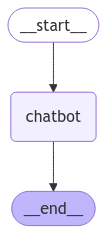

In [22]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [23]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages']) #user message
      print("Assistant:",value["messages"].content) #llm model response

User: Hey
dict_values([{'messages': AIMessage(content='Hey! 👋 \n\nWhat can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_time': 0.030909091, 'prompt_time': 0.001903046, 'queue_time': 0.082757535, 'total_time': 0.032812137}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-3b6f583f-a780-414b-81f2-f676a34ebcbc-0', usage_metadata={'input_tokens': 11, 'output_tokens': 17, 'total_tokens': 28})}])
content='Hey! 👋 \n\nWhat can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 11, 'total_tokens': 28, 'completion_time': 0.030909091, 'prompt_time': 0.001903046, 'queue_time': 0.082757535, 'total_time': 0.032812137}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-3b6f583